# Assignment 02

### part a)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path ='C:\\Users\\Dilini\\Desktop\\HASU Historical Data(2).csv'
data = pd.read_csv(file_path)

# Extract the closing prices
prices = data['Price']
# Read the CSV file
data_read = pd.read_csv(file_path)

#a)
# Display the entire DataFrame
print("a) ",data_read)



a)            Date  Price  time index
0    6/20/2022   32.2           0
1    6/21/2022   33.0           1
2    6/22/2022   33.0           2
3    6/23/2022   33.0           3
4    6/24/2022   35.0           4
..         ...    ...         ...
493   7/8/2024   58.0         493
494   7/9/2024   57.8         494
495  7/10/2024   58.0         495
496  7/11/2024   58.1         496
497  7/12/2024   58.2         497

[498 rows x 3 columns]


### part c)

In [18]:
#Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()
print("c)")

# drift parameters (u_GB) and scale  parameters (sigma)
u_GB = log_returns.mean() + 0.5 * log_returns.var()
sigma = log_returns.std()
print("log_returns:\n",log_returns,"\n")
print("µGB :",u_GB)
print("sigma",sigma,"\n")


c)
log_returns:
 1      0.024541
2      0.000000
3      0.000000
4      0.058841
5      0.002853
         ...   
493    0.012142
494   -0.003454
495    0.003454
496    0.001723
497    0.001720
Name: Price, Length: 497, dtype: float64 

µGB : 0.001464343176110666
sigma 0.023382021704588307 



### part d)

d)


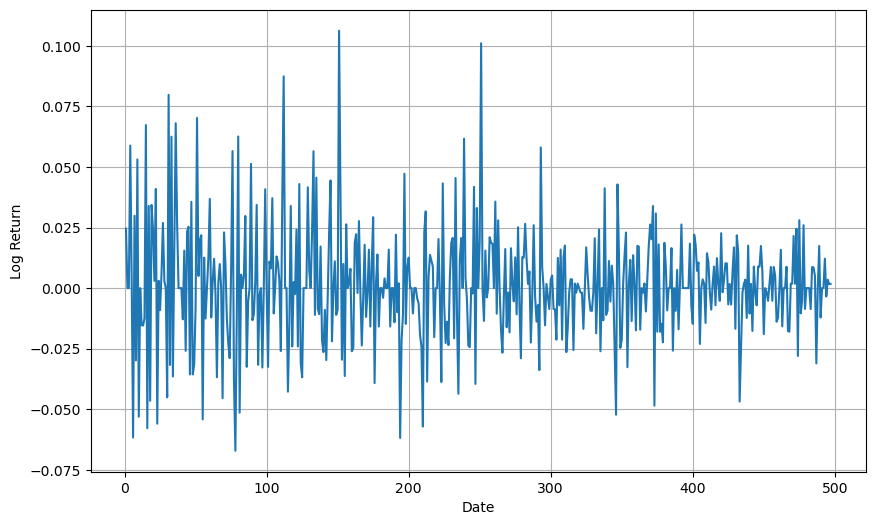

In [19]:
#Check whether it is appropriate to model the closing price of HASU using geometric Brownian motion.
# Plot the historical log returns
print("d)")
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, log_returns)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

### part e)

In [20]:
#Simulate 5000 possible sample paths for the closing price of HASU relevant to the next 20 days
simulate = 5000
days = 20
last_price = prices.iloc[-1]
dt = 1   # time step is 1 day

# Generate random paths
np.random.seed(42)
simulate_path = np.zeros((days,simulate))
simulate_path[0] = last_price
for t in range(1, n_days):
    Z = np.random.standard_normal(simulate)
    simulate_path[t] = simulate_path[t-1] * np.exp((u_GB - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

### part f)

f)


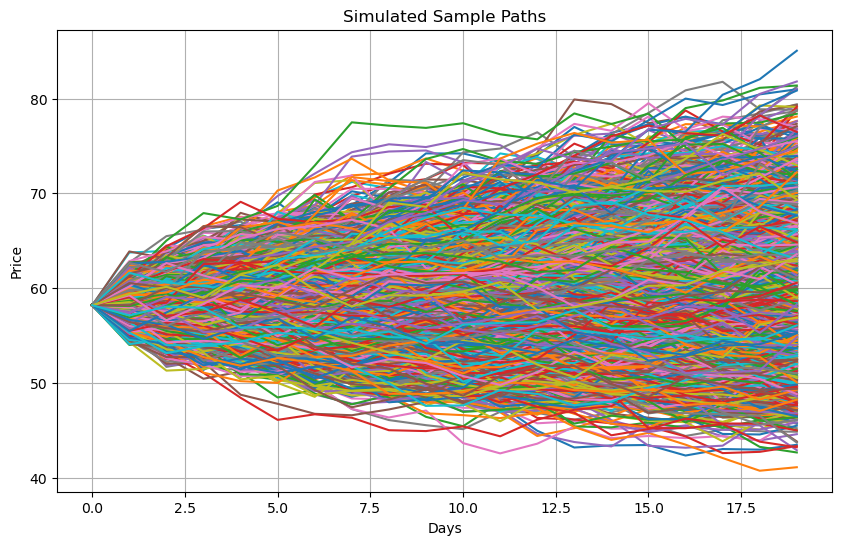

In [21]:
#Plot the sample paths
print("f)")
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths, lw=1.5)
plt.title('Simulated Sample Paths')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### part g)

g)


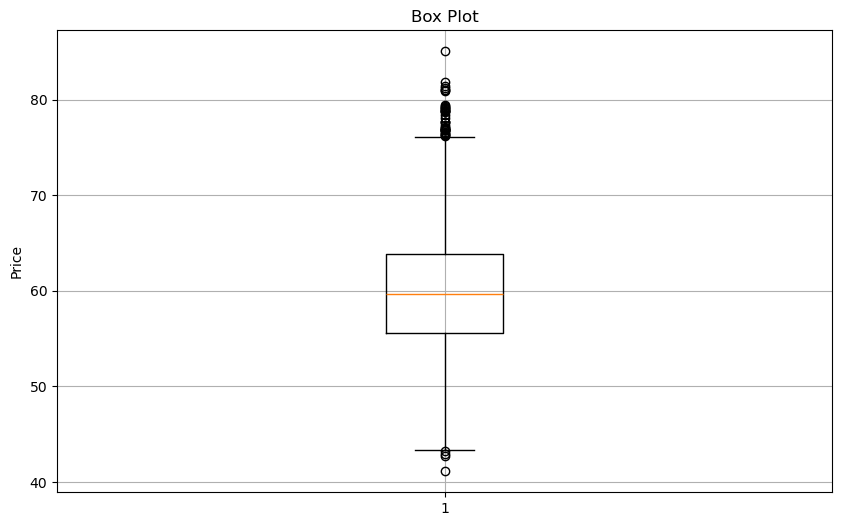

In [22]:
# box plot 
print("g)")
plt.figure(figsize=(10, 6))
plt.boxplot(simulated_paths[-1])
plt.title('Box Plot')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### part h)

In [23]:
closing_prices = simulated_paths[-1]

#probability that the closing price will be between 55 and 60
probability_55_60 = np.mean((closing_prices >= 55) & (closing_prices <= 60)) 
print("h) probability =",probability_55_60)

h) probability = 0.3066


### part i)

In [24]:
prediction_interval = np.percentile(closing_prices, [2.5, 97.5])
print("i) prediction interval=",prediction_interval)

i) prediction interval= [49.05120895 72.71516988]
